Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

Taking a look at the data

In [6]:
# Reading the dataset and converting it into a dataframe
df = pd.read_csv(r'C:\Users\REBU\Desktop\Project-Cap\creditcard.csv')

In [7]:
# Taking a look at the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Checking for null values
df.isnull().sum().max()

0

In [10]:
# Descriptive analysis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
# Checking for duplicate values
df.duplicated(keep=False).sum()

1854

In [13]:
# Find duplicate rows, considering all columns, marking all duplicates as True
duplicates_all = df.duplicated(keep=False)

In [14]:
df_duplicated = df[duplicates_all]
df_duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [15]:

# Remove duplicate rows but keep the first occurrence of each duplicate
df_unique = df.drop_duplicates(keep='first')
# To check the effect:
print("Original row count:", len(df))
print("Row count after removing duplicates:", len(df_unique))

Original row count: 284807
Row count after removing duplicates: 283726


Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Class distribution')

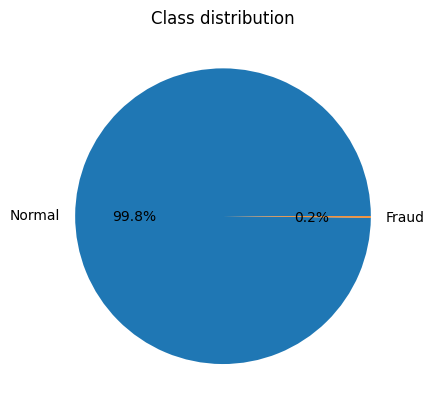

In [16]:
# Creating pie chart to visualize class distribution
plt.pie([(df_unique['Class']==0).sum() , (df_unique['Class']==1).sum()], labels=('Normal' , 'Fraud'), autopct='%1.1f%%')
plt.title('Class distribution')

In [17]:
df_unique['Time'].describe()

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

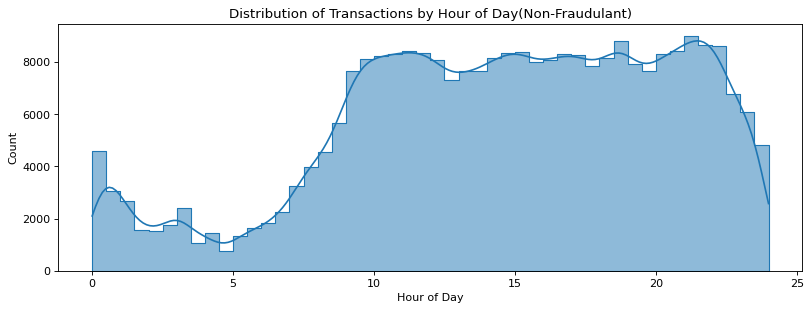

In [18]:
#Count of non fraudulant transaction over hours 
df_unique['Time_hours'] = df_unique['Time'] / 3600  # Convert time to hours for easier analysis
df_unique['Time_hours'] = df_unique['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_unique, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Non-Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


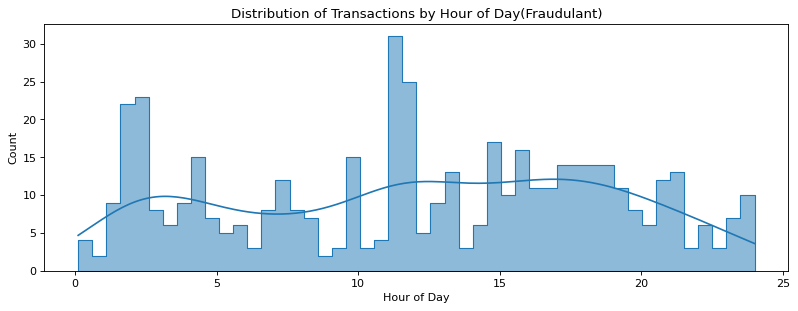

In [19]:
#Count of fraudulant transaction over hours
df_copy_fraud=df_unique[df_unique['Class']==1]
df_copy_fraud['Time_hours'] = df_copy_fraud['Time'] / 3600  # Convert time to hours for easier analysis
df_copy_fraud['Time_hours'] = df_copy_fraud['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_copy_fraud, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

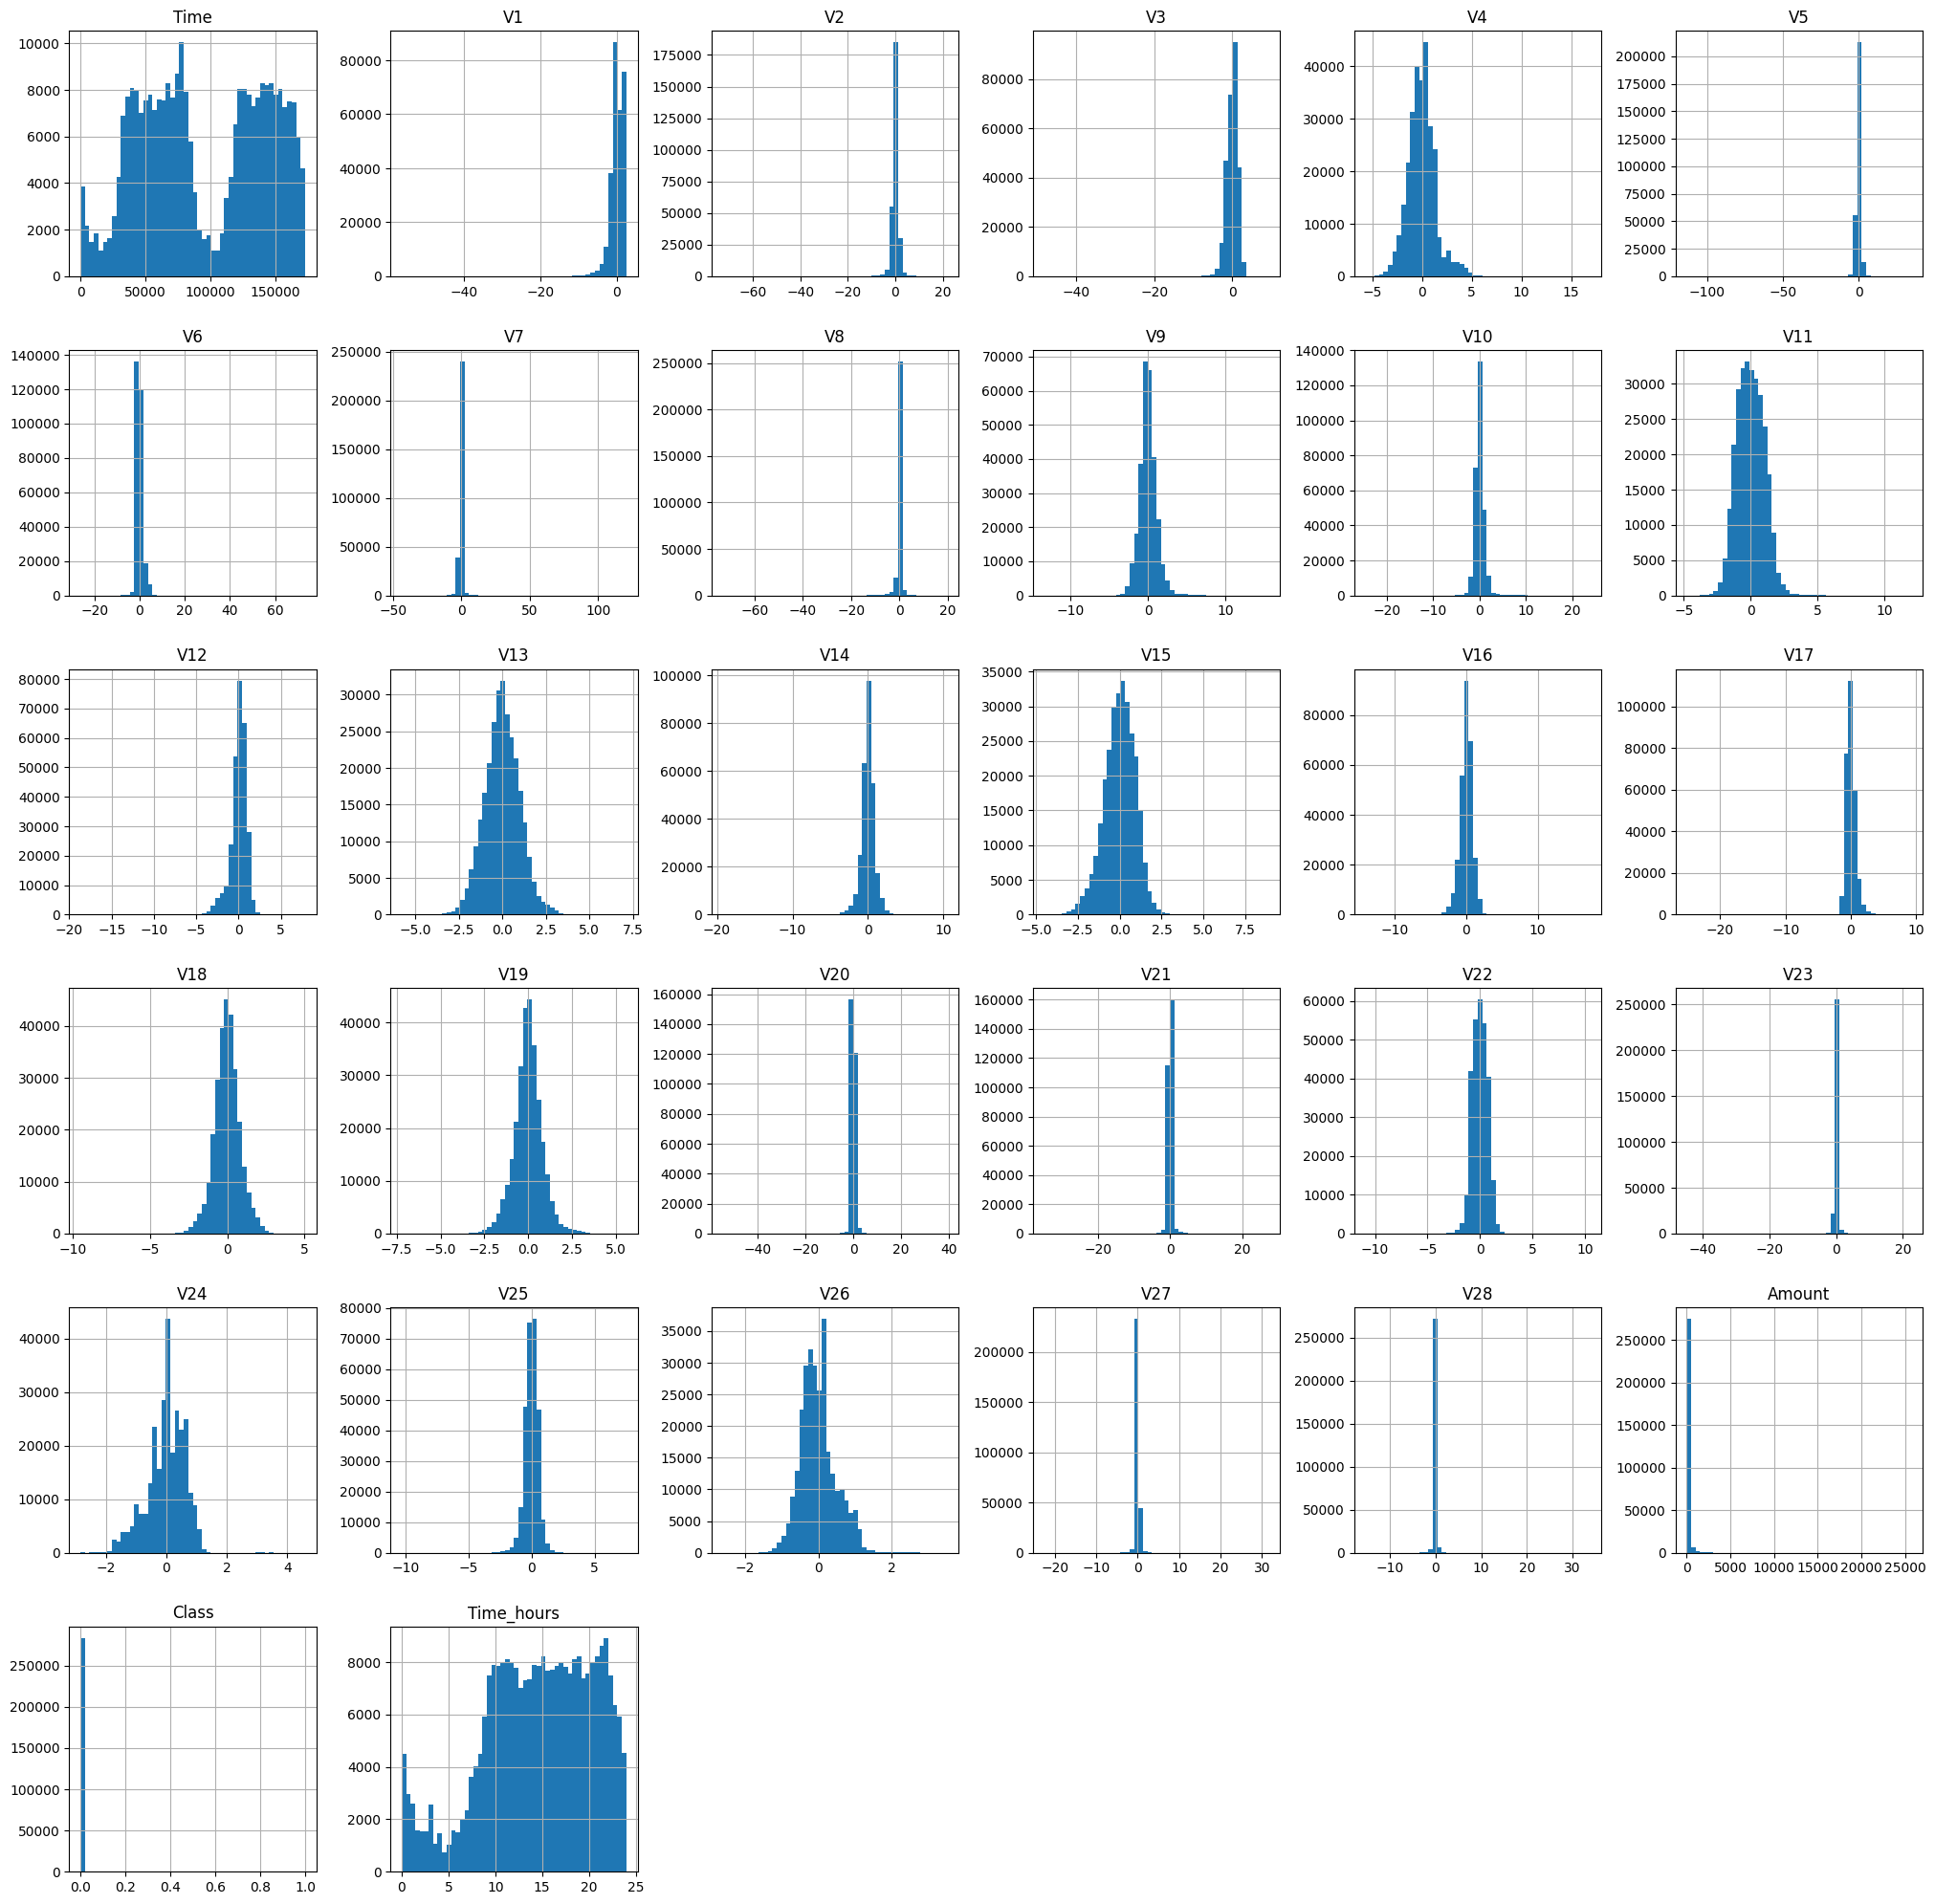

In [20]:
# Creating histograms for numerical columns to visualize data distribution
df_unique.hist(bins=50, figsize=(25,25) , grid = True)

It can be seen that all the features except time and amount are shaped normal. This means time and amount need to be scaled.

Text(0.5, 1.0, 'Non Fraud')

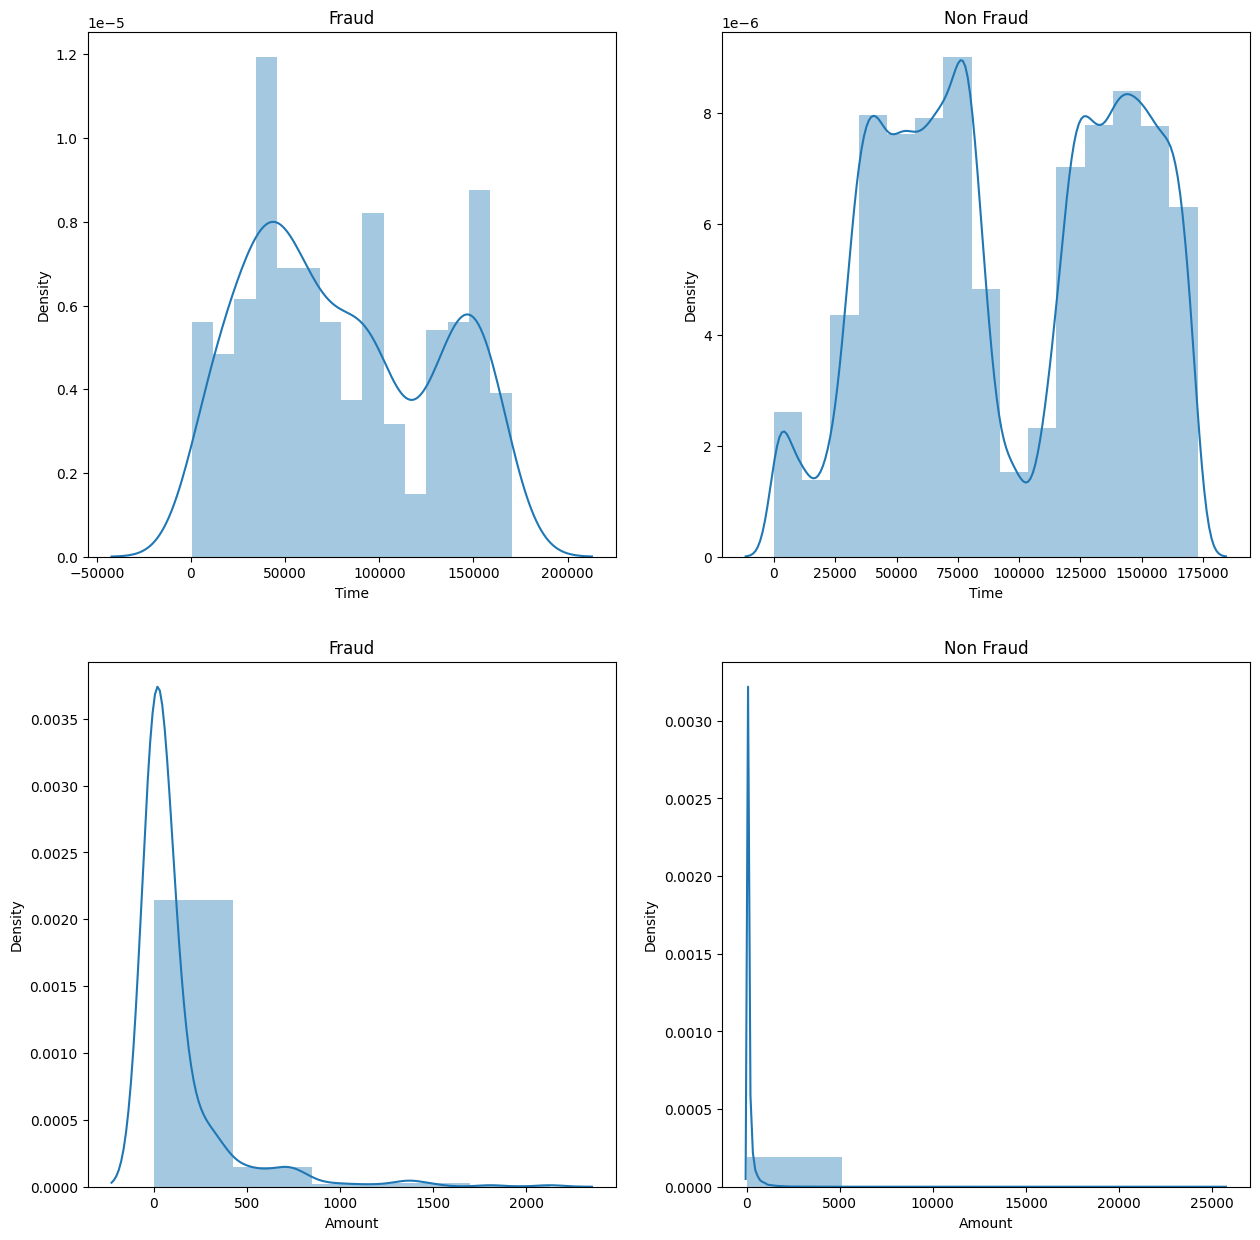

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(df_unique['Time'][df_unique['Class'] == 1], bins=15, ax=ax1)
sns.distplot(df_unique['Time'][df_unique['Class'] == 0], bins=15, ax=ax2)

sns.distplot(df_unique['Amount'][df_unique['Class'] == 1], bins=5, ax=ax3)
sns.distplot(df_unique['Amount'][df_unique['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')


In [22]:
df_unique['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 283726, dtype: float64

In [23]:
correlation_matrix = df_unique.corr()

# Print the correlation matrix
print(correlation_matrix)

                Time        V1        V2        V3        V4        V5   
Time        1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223  \
V1          0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036   
V2         -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210   
V3         -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879   
V4         -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744   
V5          0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000   
V6         -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938   
V7          0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709   
V8         -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430   
V9         -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213   
V10         0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050   
V11        -0.248536  0.001028 -0.000633  0.002339 -0.001223  0.000411   
V12         0.125500 -0.001524  0.0022

<Axes: >

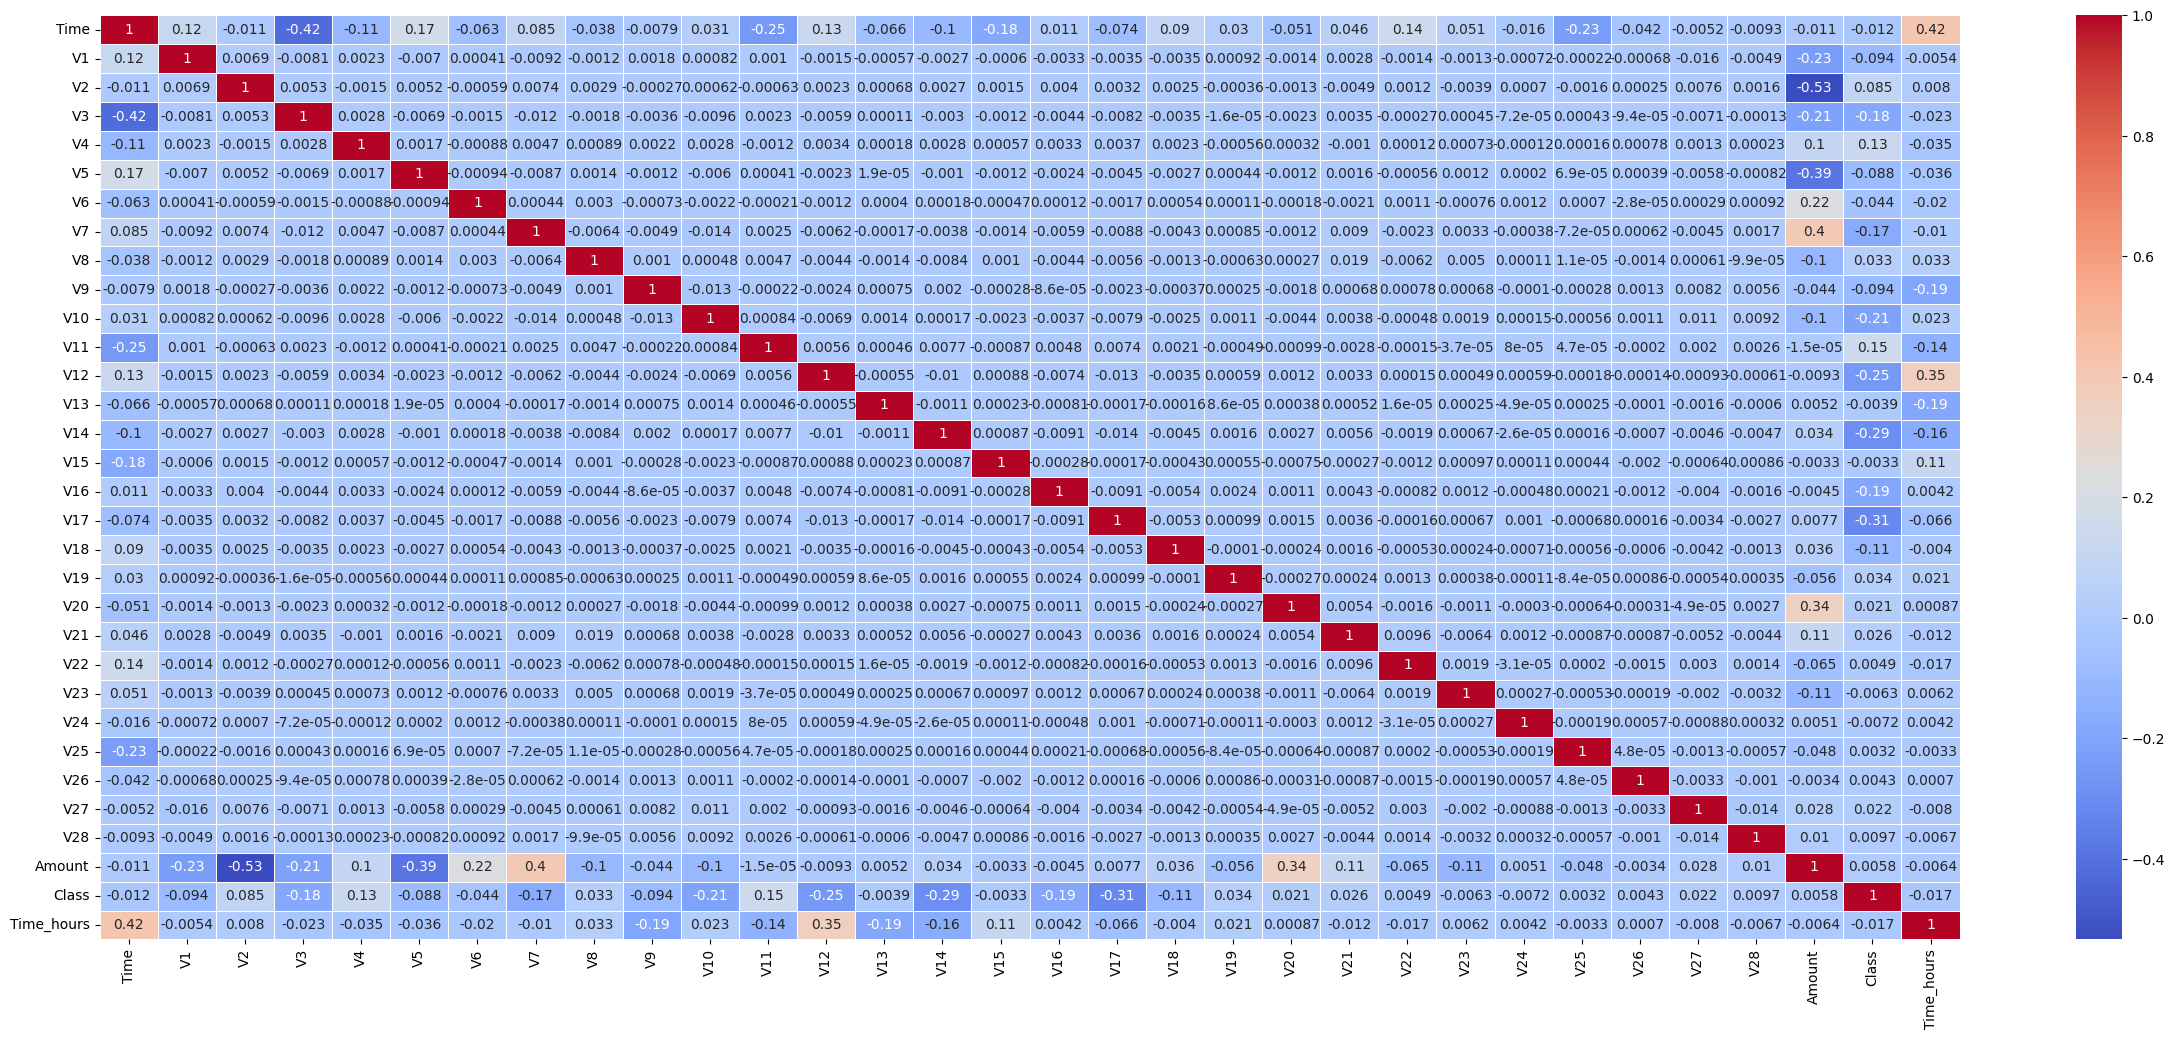

In [24]:

# Assuming your correlation matrix is stored in 'correlation_matrix'
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


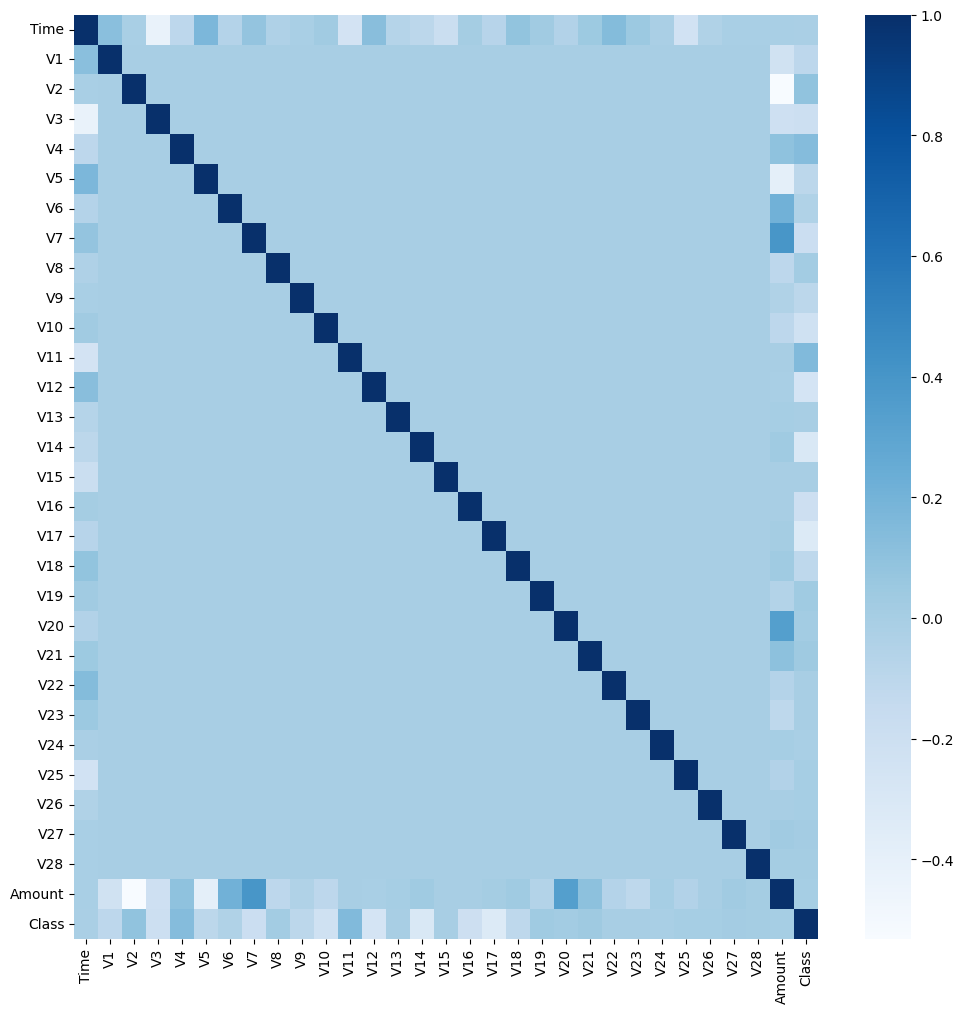

In [25]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df.corr(), cmap='Blues')
plt.show()


In [26]:
from scipy.stats import iqr
upper_limit =df_unique['Amount'].quantile(0.75)+(1.5*iqr(df_unique['Amount']))
print(upper_limit)
print(df_unique[df_unique['Amount']>upper_limit]['Class'].value_counts())


185.375
Class
0    31598
1       87
Name: count, dtype: int64


In [27]:
df_unique = df_unique[df_unique['Amount']<=8000]
print(df_unique['Class'].value_counts())
print('\nPercentage of Fraudulant activity:{:.2%}'.format((df_unique[df_unique['Class']==1].shape[0]/df_unique.shape[0])))

Class
0    283241
1       473
Name: count, dtype: int64

Percentage of Fraudulant activity:0.17%


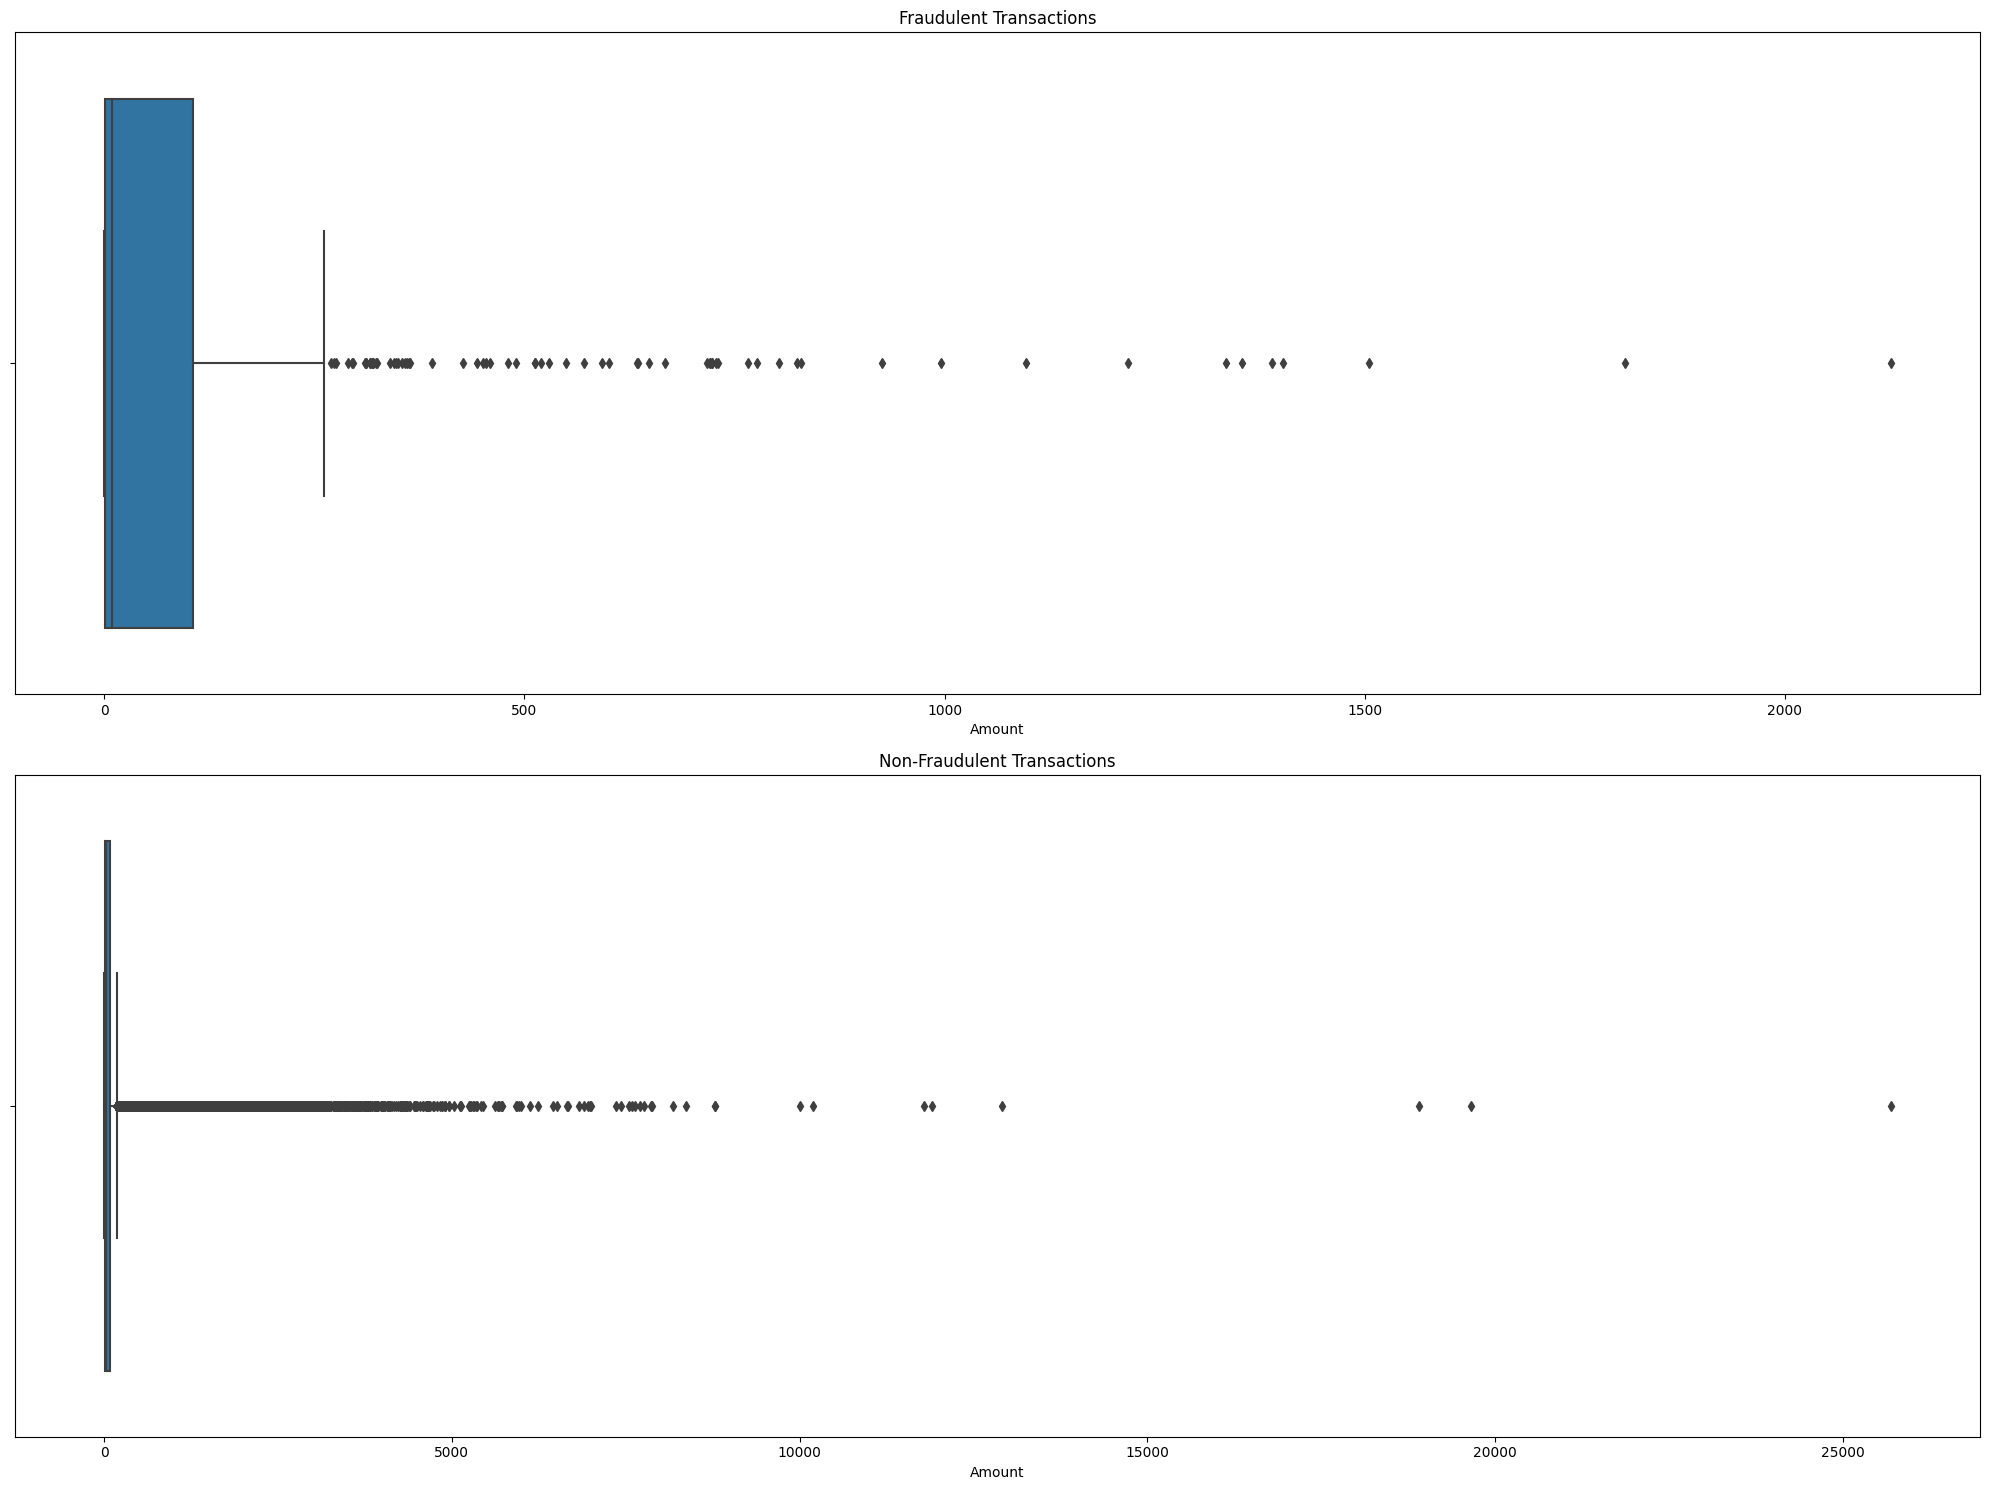

In [28]:


# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15))

# Boxplot for fraudulent transactions
sns.boxplot(data=df[df['Class'] == 1], x='Amount', ax=ax1)
ax1.set_title('Fraudulent Transactions')

# Boxplot for non-fraudulent transactions
sns.boxplot(data=df[df['Class'] == 0], x='Amount', ax=ax2)
ax2.set_title('Non-Fraudulent Transactions')

# Show the plots
plt.tight_layout()
plt.show()

Feature Engineering


In [29]:
# Scale the 'Amount' column
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [30]:
# Bin transaction amounts
bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-500', '500-1000', '1000+']

df['Amount_Category'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)